In [ ]:
#drop player that is out

In [5]:
import pandas as pd 
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [6]:
dates = [
    ['2_4', '2020-02-04'],
    ['2_3', '2020-02-03'],
    ['2_2', '2020-02-02'],
    ['2_1', '2020-02-01'],
    ['1_31', '2020-01-31'],
    ['1_30', '2020-01-30'],
    ['1_29', '2020-01-29'],
    ['1_28', '2020-01-28'],
    ['1_27', '2020-01-27'],
    ['1_26', '2020-01-26'],
    ['1_25', '2020-01-25'],
    ['1_24', '2020-01-24'],
    ['1_23', '2020-01-23'],
    ['1_22', '2020-01-22'],
    ['1_20', '2020-01-20'],
    ['1_19', '2020-01-19'],
    ['1_18', '2020-01-18'],
    ['1_17', '2020-01-17'],
    ['1_16', '2020-01-16'],
    ['1_15', '2020-01-15'],
    ['1_14', '2020-01-14'],
    ['1_13', '2020-01-13'],
    ['1_12', '2020-01-12'],
    ['1_11', '2020-01-11'],
    ['1_10', '2020-01-10'],
    ['1_9', '2020-01-09'],
    ['1_8', '2020-01-08'],
    ['1_7', '2020-01-07'],
    ['1_6', '2020-01-06'],
    ['1_5', '2020-01-05'],
    ['1_4', '2020-01-04'],
    ['1_3', '2020-01-03'],
    ['1_2', '2020-01-02'],
    ['1_1', '2020-01-01'],
    ['12_31', '2019-12-31'],
    ['12_30', '2019-12-30'],
    ['12_29', '2019-12-29'],
    ['12_28', '2019-12-28'],
    ['12_27', '2019-12-27'],
    ['12_26', '2019-12-26'],
    ['12_25', '2019-12-25'],
    ['12_23', '2019-12-23'],
    ['12_22', '2019-12-22'],
    ['12_21', '2019-12-21'],
    ['12_20', '2019-12-20'],
    ['12_19', '2019-12-19'],
    ['12_18', '2019-12-18'],
    ['12_17', '2019-12-17'],
    ['12_16', '2019-12-16'],
    ['12_15', '2019-12-15'],
    ['12_14', '2019-12-14'],
    ['12_13', '2019-12-13'],
    ['12_12', '2019-12-12'],
    ['12_11', '2019-12-11'],
    ['12_10', '2019-12-10'],
    ['12_9', '2019-12-09'],
    ['12_8', '2019-12-08'],
    ['12_7', '2019-12-07'],
    ['12_6', '2019-12-06'],
    ['12_5', '2019-12-05'],
    ['12_4', '2019-12-04'],
    ['12_3', '2019-12-03'],
    ['12_2', '2019-12-02'],
    ['12_1', '2019-12-01'],
    ['11_30', '2019-11-30'],
    ['11_29', '2019-11-29'],
    ['11_27', '2019-11-27'],
    ['11_26', '2019-11-26'],
    ['11_25', '2019-11-25'],
    ['11_24', '2019-11-24'],
    ['11_23', '2019-11-23'],
    ['11_22', '2019-11-22'],
    ['11_21', '2019-11-21'],
    ['11_20', '2019-11-20'],
    ['11_19', '2019-11-19'],
    ['11_18', '2019-11-18'],
    ['11_17', '2019-11-17'],
    ['11_16', '2019-11-16'],
    ['11_15', '2019-11-15'],
    ['11_14', '2019-11-14'],
    ['11_13', '2019-11-13'],
    ['11_12', '2019-11-12'],
    ['11_11', '2019-11-11'],
    ['11_10', '2019-11-10'],
    ['11_9', '2019-11-09'],
    ['11_8', '2019-11-08'],
    ['11_7', '2019-11-07'],
    ['11_6', '2019-11-06'],
    ['11_5', '2019-11-05'],
    ['11_4', '2019-11-04'],
    ['11_3', '2019-11-03'],
    ['11_2', '2019-11-02'],
    ['11_1', '2019-11-01'],
    ['10_31', '2019-10-31'],
    ['10_30', '2019-10-30'],
    ['10_29', '2019-10-29'],
    ['10_28', '2019-10-28'],
    ['10_27', '2019-10-27'],
    ['10_26', '2019-10-26'],
    ['10_25', '2019-10-25'],
    ['10_24', '2019-10-24'],
    ['10_23', '2019-10-23'],
    ['10_22', '2019-10-22'],   
]

drop_attribs = [
        "game_date",
        'ppg_projection', 
        'value_projection', 
        'Proj FP', 
        'Proj Min', 
        'Proj Val',
        "position",
        "salary", 
        "Actual Min",
        "Actual Val",
]

In [7]:
def mergeAllDates():
    file = pd.DataFrame()
    for game_day in dates:
        game_date = 'HistoricalData_Merged/{}'.format(game_day[1])
        file = file.append(addPlayerOccurences(pd.read_csv(game_date), game_day[1]), ignore_index=True)
    return file

def addPlayerOccurences(file, date):
    file['Selected'] = np.nan
    game_date = 'BestLineups/{}'.format(date)
    best_lineups_file = pd.read_csv(game_date,index_col=[0,1], skipinitialspace=True)
    values = best_lineups_file['Player Name'].value_counts().keys().tolist()
    counts = best_lineups_file['Player Name'].value_counts().tolist()
    for i in range(len(values)):
        file.loc[file['Player Name'] == values[i],['Selected']] = counts[i]
    file['Selected'].fillna(0, inplace=True)
    return file
    
def reduceForProjectionAnalysis(file):
    file['FantasyFuelPPGProj'] = file['ppg_projection']
    file['FantasyFuelValueProj'] = file['value_projection']
    file['DFN_PPGProj'] = file['Proj FP']
    file['DFN_MinProj'] = file['Proj Min']
    file['DFN_ValueProj'] = file['Proj Val']
    file.drop(drop_attribs, axis=1, inplace=True)
    #file = file.loc[file['Actual FP'] > 0]
    return file



In [8]:
def cleanFeatures(features): 
    features['L5_ppg_floor'].fillna(0, inplace=True)
    features['L5_ppg_avg'].fillna(0, inplace=True)
    features['L5_ppg_max'].fillna(0, inplace=True)
    features['spread'].fillna(features['spread'].mean(), inplace=True)
    features['over_under'].fillna(features['over_under'].mean(), inplace=True)
    features['implied_team_score'].fillna(features['implied_team_score'].mean(), inplace=True)
    features['Rest'].fillna(features['Rest'].mean(), inplace=True)
    features['injury_status'].fillna('good', inplace=True)
    return features

def encodeFeatures(features):
    nba_player = features['Player Name']
    nba_injury = features['injury_status']
    nba_team = features['team']
    nba_opp = features['opp']
    nba_pos = features['Pos']
    nba_dvp = features['Opp DvP']
    
    nba_player_encoded, nba_player_categories = nba_player.factorize()
    nba_injury_encoded, nba_injury_categories = nba_injury.factorize()
    nba_team_encoded, nba_team_categories = nba_team.factorize()
    nba_opp_encoded, nba_opp_categories = nba_opp.factorize()
    nba_pos_encoded, nba_pos_categories = nba_pos.factorize()
    nba_dvp_encoded, nba_dvp_categories = nba_dvp.factorize()
    
    features['Player Name'] = nba_player_encoded
    features['injury_status'] = nba_injury_encoded
    features['team'] = nba_team_encoded
    features['opp'] = nba_opp_encoded
    features['Pos'] = nba_pos_encoded
    features['Opp DvP'] = nba_dvp_encoded
    return features

In [10]:
full_df = reduceForProjectionAnalysis(mergeAllDates())
full_df['Avg Proj'] = ((full_df['DFN_PPGProj']+full_df['FantasyFuelPPGProj'])/2)
full_df = full_df[full_df['injury_status'] != 'O']


encoded_df = encodeFeatures(cleanFeatures(full_df.drop(['Actual FP', 'Selected'], axis=1))).copy()

In [11]:
encoded_df.shape

(13678, 33)

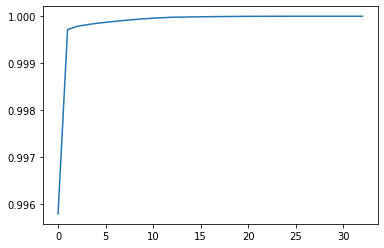

In [14]:
pca = PCA()
pca.fit(encoded_df)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum>=.95) + 1

plt.plot(cumsum)

1